# Final Project Scoring

**Total 30 points**:

Task1: 10 Points

Task2: 5 Points

Task3: 15 points


Scoring will be based on:
- Code working with no errors and correct ML logic
- Explanation of your work, reports.

**Task 1**

- Encode data **3p**

- Handle missing values if any **1p**

- Correct errors, inconsistencies, remove duplicates if any **1p**

- Outlier detection and treatment if any **1p**

- Normalization / Standardization if necesarry **1p**

- Feature engineering **3p**

**Total: 10 p** + optional bonus score

**Task 2**

- Analyze hours-per-week Target Distribution **1p**

  - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**

**Total: 5 p** + optional bonus score

**Task 3**

- Model Selection and Setup **2p**:
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*

- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
    - Experimentation: *8p*

- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics *1p*
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

  **Total: 15 p** + optional bonus score

# Final Project optional tasks, bonus score

- Optional tasks will add bonus score, to the final_project_score
- Tough scoring for bonus tasks is not detailed, the bonus scoring will be simillar with the scoring of the required tasks.

# Bonus Point on presence and class activity

Max +1 additional bonus point for presence added to grade

Max +1 additional bonus point for activity added to grade

Total Max **2 Bonus Points added to the grade**

Note:
- Bonus points based on presence and activity has a bigger impact than the bonus score for optional tasks.
- Bonus points are added to final grade, while bonus score will be added to the final_project_score, than apply sigmoid on it.

# Final grade

final_project_score = score required tasks + score optional tasks

grade = sigmoid(final_project_score)

final_grade = grade + bonus_points

final_grade = round(final_grade)


# Sigmoid graph example

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def round_half_up_2(x):
    return np.floor(x * 100 + 0.5) / 100


15


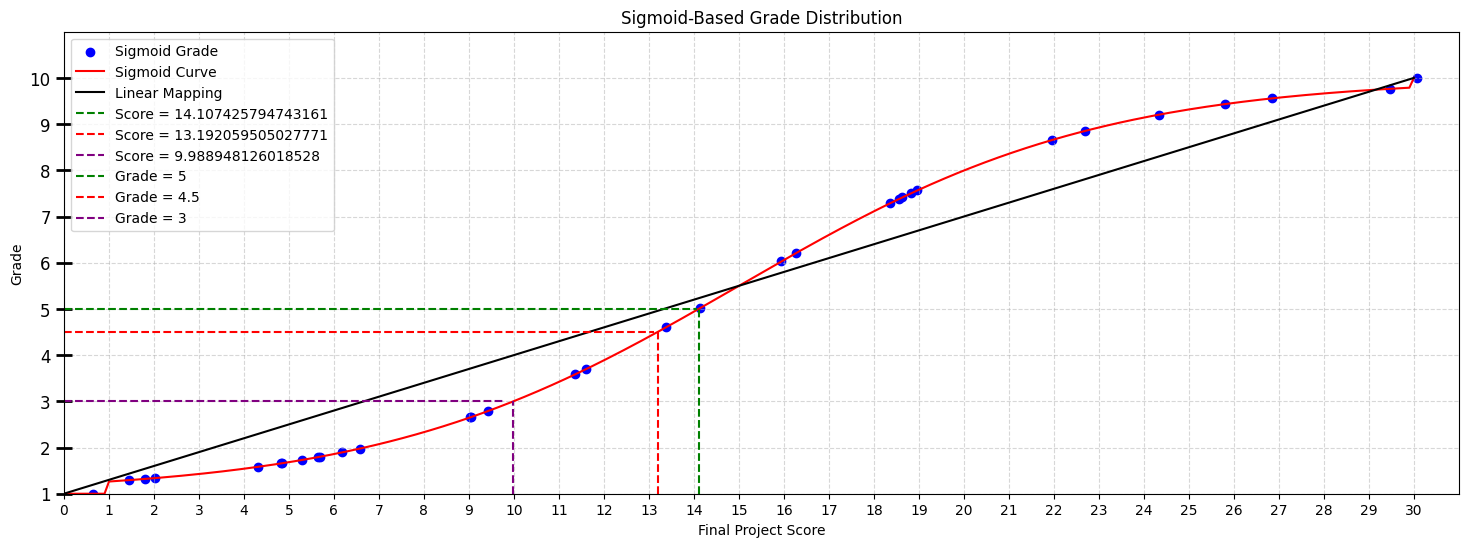

score: 0.0 grade: 1.0 final grade: 1
score: 0.5 grade: 1.0 final grade: 1
score: 1.0 grade: 1.0 final grade: 1
score: 1.5 grade: 1.3 final grade: 1
score: 2.0 grade: 1.34 final grade: 1
score: 2.5 grade: 1.38 final grade: 1
score: 3.0 grade: 1.43 final grade: 1
score: 3.5 grade: 1.48 final grade: 1
score: 4.0 grade: 1.54 final grade: 2
score: 4.5 grade: 1.61 final grade: 2
score: 5.0 grade: 1.68 final grade: 2
score: 5.5 grade: 1.77 final grade: 2
score: 6.0 grade: 1.86 final grade: 2
score: 6.5 grade: 1.96 final grade: 2
score: 7.0 grade: 2.07 final grade: 2
score: 7.5 grade: 2.2 final grade: 2
score: 8.0 grade: 2.33 final grade: 2
score: 8.5 grade: 2.48 final grade: 2
score: 9.0 grade: 2.64 final grade: 3
score: 9.5 grade: 2.82 final grade: 3
score: 10.0 grade: 3.0 final grade: 3
score: 10.5 grade: 3.21 final grade: 3
score: 11.0 grade: 3.42 final grade: 3
score: 11.5 grade: 3.65 final grade: 4
score: 12.0 grade: 3.89 final grade: 4
score: 12.5 grade: 4.14 final grade: 4
score: 13.0 

In [3]:
# Midpoint of the sigmoid curve.
# This represents the score where the sigmoid transitions most steeply.
# A natural choice is half of the maximum score (e.g. 30 / 2 = 15),
# but it can also be set to the mean of the observed scores.
x_mid = 15

# Steepness parameter of the sigmoid.
# Controls how fast grades increase around x_mid:
# - smaller k  -> smoother transition (more linear behavior)
# - larger k   -> steeper transition (more threshold-like behavior)
k = 0.25
# You can experiment with different values of x_mid and k to adjust grading behavior.


# ---------------------------------------------------------------------
# Generate simulated score values
# ---------------------------------------------------------------------

# Fix random seed for reproducibility
np.random.seed(42)

# Generate random scores between 0 and 31
# These simulate final project scores
x_values = np.concatenate([
    np.random.uniform(0, 31, 33),
])

# Sort scores for cleaner visualization
x_values.sort()

# x_mid could also be computed dynamically as the mean score:
# x_mid = x_values.mean()
print(x_mid)


# ---------------------------------------------------------------------
# Definition of the scaled sigmoid grading function
# ---------------------------------------------------------------------

# Scaled sigmoid function mapping scores to grades in the range [1, 10].
# The standard sigmoid outputs values in (0, 1).
# By scaling with 9 and adding 1, the final grade range becomes [1, 10].
#
# grade = 1 + 9 / (1 + exp(-k * (score - x_mid)))
def sigmoid_scaled(x, x_mid=x_mid, k=k):
    return 1 + 9 / (1 + np.exp(-k * (x - x_mid)))


# Inverse of the scaled sigmoid function.
# This allows computing the required score for a given grade.
# Used to draw vertical reference lines for grades 3, 4.5, and 5.
def inverse_sigmoid(y, x_mid=x_mid, k=k):
    return x_mid - (1 / k) * np.log((9 / (y - 1)) - 1)


# Clipped version of the sigmoid grading function.
# Ensures:
# - Minimum grade is 1
# - Maximum grade is 10
# - Scores above 30 receive grade 10
def clip_sigmoid_scaled(x, **kvargs):
    s = sigmoid_scaled(x, **kvargs)
    v1 = lambda x: np.where(x < 30, s, 10)
    v = np.where(x > 1, v1(x), 1)
    return v


# ---------------------------------------------------------------------
# Compute score thresholds corresponding to key grades
# ---------------------------------------------------------------------

# Score required to obtain grade 5
x1 = inverse_sigmoid(5)

# Score required to obtain grade 4.5
x2 = inverse_sigmoid(4.5)

# Score required to obtain grade 3
x3 = inverse_sigmoid(3)


# Compute grades for simulated scores
y_values = clip_sigmoid_scaled(x_values)


# ---------------------------------------------------------------------
# Visualization
# ---------------------------------------------------------------------

plt.figure(figsize=(18, 6))

# Scatter plot of simulated scores and their corresponding sigmoid grades
plt.scatter(x_values, y_values, color='blue', label='Sigmoid Grade')

# Continuous sigmoid curve
x_curve = np.linspace(0, 30, 300)
y_curve = clip_sigmoid_scaled(x_curve)
plt.plot(x_curve, y_curve, color='red', label='Sigmoid Curve')

# Linear grading reference (uniform mapping from 1 to 10)
x_lin = np.linspace(0, 30, 300)
y_lin = np.linspace(1, 10, 300)
plt.plot(x_lin, y_lin, color='black', label='Linear Mapping')


# Vertical lines showing score thresholds for grades 5, 4.5, and 3
plt.axvline(x=x1, color='green', linestyle='--',
            label=f'Score = {x1}', ymin=0, ymax=5/10-0.1)
plt.axvline(x=x2, color='red', linestyle='--',
            label=f'Score = {x2}', ymin=0, ymax=4.5/10-0.1)
plt.axvline(x=x3, color='purple', linestyle='--',
            label=f'Score = {x3}', ymin=0, ymax=3/10-0.1)

# Horizontal lines indicating grade levels
plt.axhline(y=5, color='green', linestyle='--',
            label='Grade = 5', xmin=0, xmax=(x1/30)-(1/60))
plt.axhline(y=4.5, color='red', linestyle='--',
            label='Grade = 4.5', xmin=0, xmax=(x2/30)-(1/60))
plt.axhline(y=3, color='purple', linestyle='--',
            label='Grade = 3', xmin=0, xmax=(x3/30)-(1/60))


# Axis formatting
plt.xticks(np.arange(0, 31, 1), fontsize=10)
plt.yticks(np.arange(1, 11, 1), fontsize=10)

ax = plt.gca()
ax.set_ylim(1, 11)
ax.set_xlim(0, 31)

# Improve tick appearance
ax.tick_params(axis='y', which='both', direction='inout', length=4)
ax.tick_params(axis='y', which='major', length=8)
ax.tick_params(axis='y', which='major', length=12, width=2, color='black',
               labelsize=12, labelcolor='black',
               grid_alpha=0.5)

# Grid and labels
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlabel("Final Project Score")
plt.ylabel("Grade")
plt.title("Sigmoid-Based Grade Distribution")
plt.legend()

plt.show()


# ---------------------------------------------------------------------
# Print grade values for scores from 0 to 30 in steps of 0.5
# ---------------------------------------------------------------------

# Displays:
# - raw sigmoid grade
# - rounded grade to 2 decimals
# - final integer grade after rounding
for i in np.arange(0, 30.5, 0.5):
    grade = clip_sigmoid_scaled(i)
    grade = np.round(grade, 2)
    print(f'score: {i} grade: {grade} final grade: {round(grade)}')


# Grades example distribution

In [4]:
# ---------------------------------------------------------------------
# Raw project scores (before any adjustments)
# ---------------------------------------------------------------------
scores = np.array([
    21.5,   12, 21.5, 24.5, 35.5,
    26.5,   21,    0,   26, 39.5,
     6.5,  8.5,   17, 21.1, 21.5,
    24.5,    0, 27.5, 14.5,    0,
    14.7,   29, 17.3,   18,   30,
    20.2,   23,   20,   19, 19.5,
      26, 23.5
])


# ---------------------------------------------------------------------
# Extra points awarded individually (e.g., bonuses, reassessments)
# A value of 0 means no adjustment for that student
# ---------------------------------------------------------------------
extra_points = np.array([
     0,    0,  0, 0,  0,
     0,  1.5, 17, 0,  0,
    15,  9.5,  0, 0,  0,
     0, 20.5,  0, 0, 16,
     0,    0,  0, 0,  0,
     0,    0,  0, 0,  0,
     0,    0
])

# Final project score after adding extra points
final_scores = scores + extra_points


# ---------------------------------------------------------------------
# Attendance score (normalized between 0 and 1)
# Represents presence during the course
# ---------------------------------------------------------------------
attendance = np.array([
    0.85, 0.14, 0.64, 0.82, 0.73,
    0.76, 0.93, 0.29, 0.71, 0.82,
    0.29,    0,    0, 0.46, 0.14,
    0.84, 0.14, 0.29, 0.85, 0.14,
    0.84, 0.67, 0.67, 0.82, 0.78,
    0.71, 0.8,  0.71, 0.14, 0.68,
    1, 0.29
])


# ---------------------------------------------------------------------
# Activity score (normalized between 0 and 1)
# Represents participation during the course
# ---------------------------------------------------------------------
activity = np.array([
    0.2,  0.5, 0.2, 0.75,  0.5,
    0.75, 0.2,   0,    0, 0.75,
    0,      0,   0,    0,    0,
    0.5,    0,   0,  0.2,    0,
    0.2, 0.75, 0.2,    0,  0.2,
      0,    0, 0.2,    0,    0,
      0, 0
])


# ---------------------------------------------------------------------
# Grade computation using the sigmoid-based grading model
# ---------------------------------------------------------------------

# Convert final project scores into grades using the sigmoid function
grades = clip_sigmoid_scaled(final_scores)

# Apply round-half-up to two decimal places
grades = round_half_up_2(grades)


# ---------------------------------------------------------------------
# Linear grading model (used as baseline / comparison)
# ---------------------------------------------------------------------

# Define linear transformation parameters
max_score = 30
min_score = 0
max_grade = 10
min_grade = 1

# Scaling factor to map score range [0, 30] → grade range [1, 10]
scale_factor = (max_grade - min_grade) / (max_score - min_score)

# Compute linear grades (capped at 10)
grades_lin = [
    1 + min((score - min_score) * scale_factor, 9)
    for score in final_scores
]


# ---------------------------------------------------------------------
# Final grade adjustment: base grade + attendance + activity
# ---------------------------------------------------------------------

# Sigmoid-based final grades (capped at 10)
final_grades = np.array([
    min(10, grade + v1 + v2)
    for grade, v1, v2 in zip(grades, attendance, activity)
])

# Final integer grades using round-half-up
final_grades_round = np.floor(final_grades + 0.5).astype(int)


# Linear-based final grades (capped at 10)
final_grades_lin = np.array([
    min(10, grade + v1 + v2)
    for grade, v1, v2 in zip(grades_lin, attendance, activity)
])

# Final integer grades (linear model)
final_grades_lin_round = np.floor(final_grades_lin + 0.5).astype(int)


# ---------------------------------------------------------------------
# Create a DataFrame summarizing all grading components
# ---------------------------------------------------------------------
df = pd.DataFrame({
    'score': scores,
    'extra_point': extra_points,
    'final_score': final_scores,
    'grade_sig': grades,
    'grade_lin': grades_lin,
    'attendance': attendance,
    'activity': activity,
    'final_grade_sig': final_grades,
    'final_grade_lin': final_grades_lin,
    'final_grade_sig_round': final_grades_round,
    'final_grade_lin_round': final_grades_lin_round,
})

df


,score,extra_point,final_score,grade_sig,grade_lin,attendance,activity,final_grade_sig,final_grade_lin,final_grade_sig_round,final_grade_lin_round
0,21.5,0.0,21.5,8.52,7.45,0.85,0.20,9.57,8.50,10,9
1,12.0,0.0,12.0,3.89,4.60,0.14,0.50,4.53,5.24,5,5
2,21.5,0.0,21.5,8.52,7.45,0.64,0.20,9.36,8.29,9,8
3,24.5,0.0,24.5,9.23,8.35,0.82,0.75,10.00,9.92,10,10
4,35.5,0.0,35.5,10.00,10.00,0.73,0.50,10.00,10.00,10,10
5,26.5,0.0,26.5,9.52,8.95,0.76,0.75,10.00,10.00,10,10
6,21.0,1.5,22.5,8.80,7.75,0.93,0.20,9.93,8.88,10,9
7,0.0,17.0,17.0,6.60,6.10,0.29,0.00,6.89,6.39,7,6
8,26.0,0.0,26.0,9.46,8.80,0.71,0.00,10.00,9.51,10,10
9,39.5,0.0,39.5,10.00,10.00,0.82,0.75,10.00,10.00,10,10


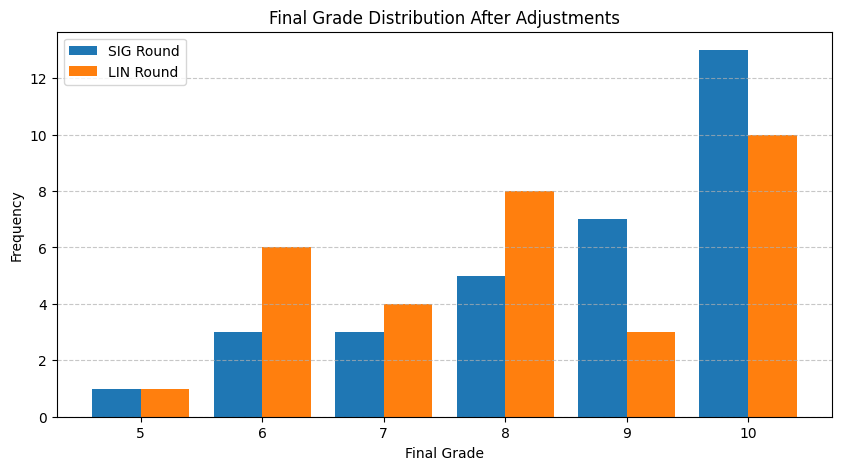

In [5]:
final_distribution = df['final_grade_sig_round'].value_counts().sort_index()
final_distribution2 = df['final_grade_lin_round'].value_counts().sort_index()

# index comun (toate notele posibile)
grades = sorted(set(final_distribution.index).union(final_distribution2.index))

values1 = [final_distribution.get(g, 0) for g in grades]
values2 = [final_distribution2.get(g, 0) for g in grades]

x = np.arange(len(grades))
width = 0.4

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, values1, width, label='SIG Round')
plt.bar(x + width/2, values2, width, label='LIN Round')

plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Final Grade Distribution After Adjustments')
plt.xticks(x, grades)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
